In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data
data=pd.read_csv("Listings.csv", encoding="ISO-8859-1")

In [3]:
# giving them number values in order to be able to find correlation
ins_bookable_num = {'f': 0,'t': 10}

data.instant_bookable = [ins_bookable_num[item] for item in data.instant_bookable]

In [4]:
# Finding correlation between Review Scores Rating,Cleanliness score, location score, whether it's instant bookable, communication score
corr_data= data[['review_scores_rating', 'review_scores_cleanliness', 'review_scores_location', 'instant_bookable','review_scores_communication']]

<AxesSubplot:>

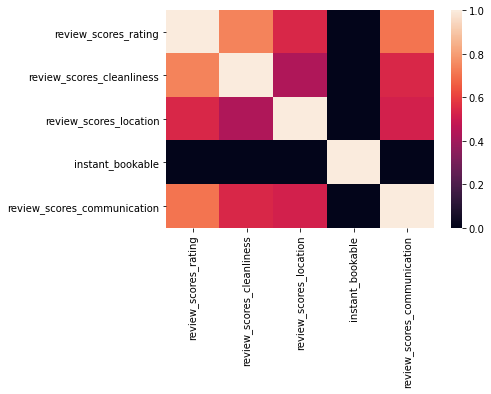

In [5]:
correlation=corr_data.corr()
sns.heatmap(correlation, vmin=0, vmax=1)

## Cleanliness and communication seems to correlate to review scores rating

In [6]:
df=data[['city','neighbourhood','review_scores_rating', 'review_scores_cleanliness', 'review_scores_location', 'instant_bookable','review_scores_communication', 'latitude', 'longitude']]

In [7]:
# Finding out how many listings each neighbourhood has
df['freq']=df.groupby(by='neighbourhood')['neighbourhood'].transform('count')

In [8]:
# Making sure the neighbourhood has at least 5 listings before finding average to get rid of outliers
df= df[(df.freq >= 5)]

In [9]:
cleanliness_avg=df.groupby(["city", "neighbourhood"], as_index=False)["review_scores_cleanliness", "review_scores_communication", "review_scores_rating", "latitude", "longitude","freq"].mean()

In [10]:
# Finding out which neighborhoods have listings with low cleanliness and communication socres on average
cleanliness_df = cleanliness_avg[(cleanliness_avg.review_scores_cleanliness <= 8) & (cleanliness_avg.review_scores_communication <= 8)]

In [11]:
# These are the cities/ neighborhoods where I would suggest to invest
cleanliness_df

,city,neighbourhood,review_scores_cleanliness,review_scores_communication,review_scores_rating,latitude,longitude,freq
44,Bangkok,Thawi Watthana,7.500000,7.250000,72.000000,13.783896,100.364224,18
72,Cape Town,Ward 22,6.000000,7.600000,44.000000,-33.945927,18.612143,15
117,Cape Town,Ward 92,7.750000,7.750000,75.000000,-34.045617,18.660383,6
469,Rio de Janeiro,Pedra de Guaratiba,6.750000,8.000000,73.750000,-23.002826,-43.636747,9
490,Rio de Janeiro,Santissimo,7.333333,7.333333,73.333333,-22.874039,-43.524382,9


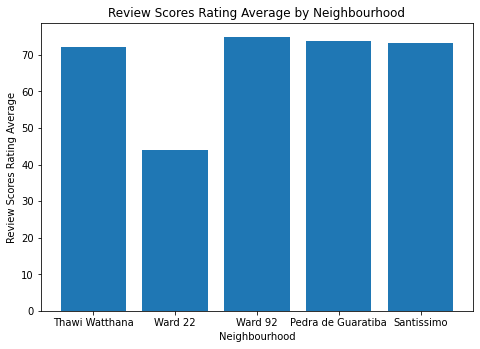

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cleanliness_df.neighbourhood,cleanliness_df.review_scores_rating)
ax.set_ylabel('Review Scores Rating Average')
ax.set_xlabel('Neighbourhood')
ax.set_title('Review Scores Rating Average by Neighbourhood')
plt.show()

## Now I'm making a wordcloud of amenities of lisitings with 90+ review score

In [13]:
cloud_data= data[['amenities','review_scores_rating']]

In [14]:
high_cloud_data = cloud_data[(cloud_data.review_scores_rating >= 90)]

In [15]:
# Getting rid of stop words.
comment_words = ''
stopwords = set(STOPWORDS)

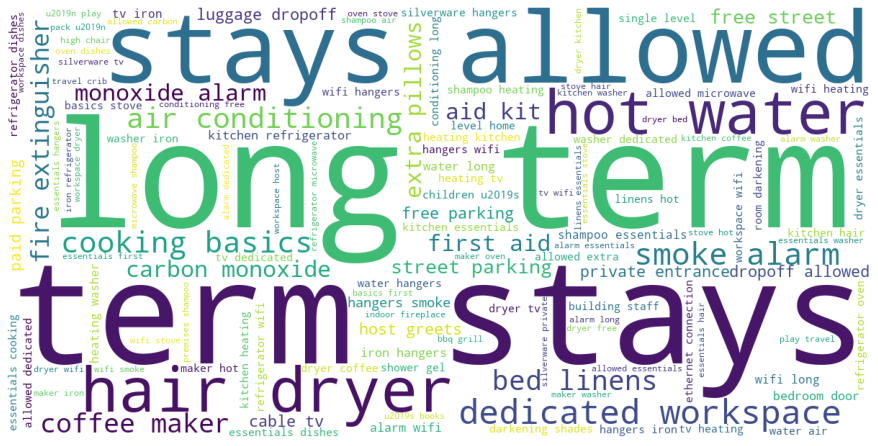

In [16]:
for val in high_cloud_data.amenities:
      
    val = str(val)
  
    tokens = val.split()
      
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1200, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()